# Analysis and Visualization
This notebook is focused on the model in action and answers the question you posed or address the problem we are investigating. Includes plots and visualizations as necessary to address the question and/or research topic.

### Sandy Tam -- CNN Analysis and Visualization

In [1]:
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
import numpy as np

# Set device
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Using device:", device)

Using device: cuda


In [2]:
class CatBreedCNN(nn.Module):
    def __init__(self, num_classes=66, kernel_size=3):
        super(CatBreedCNN, self).__init__()
        
        padding = kernel_size // 2
        
        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size, padding=padding)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size, padding=padding)
        self.bn2 = nn.BatchNorm2d(64)
        
        # Block 2
        self.conv3 = nn.Conv2d(64, 128, kernel_size, padding=padding)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size, padding=padding)
        self.bn4 = nn.BatchNorm2d(128)
        
        # Block 3
        self.conv5 = nn.Conv2d(128, 256, kernel_size, padding=padding)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size, padding=padding)
        self.bn6 = nn.BatchNorm2d(256)
        
        # Block 4
        self.conv7 = nn.Conv2d(256, 512, kernel_size, padding=padding)
        self.bn7 = nn.BatchNorm2d(512)
        self.conv8 = nn.Conv2d(512, 512, kernel_size, padding=padding)
        self.bn8 = nn.BatchNorm2d(512)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.conv_dropout = nn.Dropout2d(0.2) 
        self.dropout1 = nn.Dropout(0.5)        
        self.dropout2 = nn.Dropout(0.5)        
        self.dropout3 = nn.Dropout(0.4)        
        
        # Adaptive pooling to handle any input size
        self.adaptive_pool = nn.AdaptiveAvgPool2d((7, 7))
        
        # Fully connected layers
        self.fc1 = nn.Linear(512 * 7 * 7, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Block 1
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.conv_dropout(x)
        
        # Block 2
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.conv_dropout(x)
        
        # Block 3
        x = self.relu(self.bn5(self.conv5(x)))
        x = self.relu(self.bn6(self.conv6(x)))
        x = self.pool(x)
        x = self.conv_dropout(x)
        
        # Block 4
        x = self.relu(self.bn7(self.conv7(x)))
        x = self.relu(self.bn8(self.conv8(x)))
        x = self.pool(x)
        x = self.conv_dropout(x)
        
        # Adaptive pooling
        x = self.adaptive_pool(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # FC layers
        x = self.dropout1(x)
        x = self.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.relu(self.fc2(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        
        return x

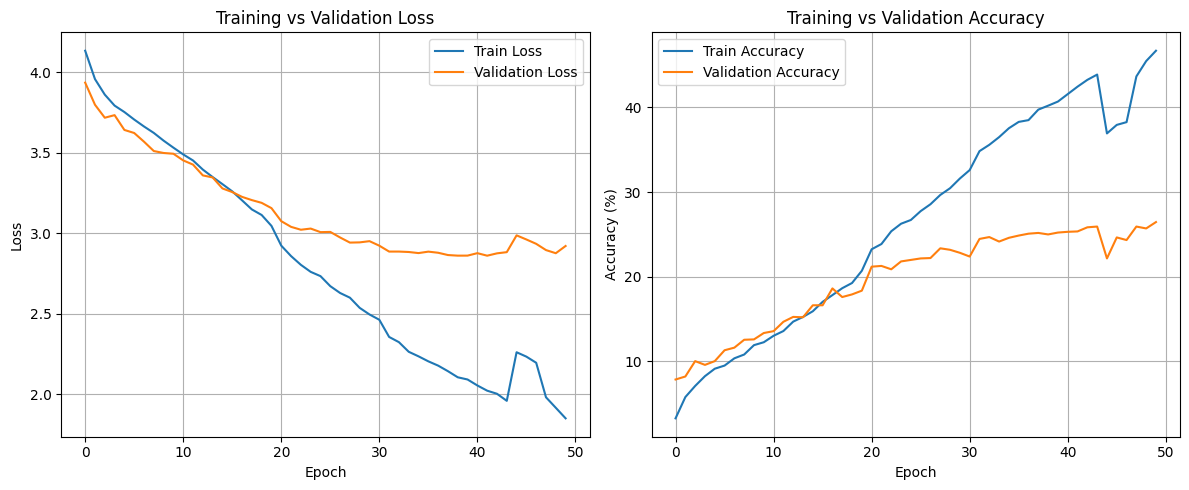

Best Validation Accuracy: 26.45%


In [3]:
# Load training history
history_path = os.path.join('CNN', 'training_history.json')

if os.path.exists(history_path):
    with open(history_path, 'r') as f:
        history = json.load(f)
    
    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Best Validation Accuracy: {max(history['val_acc']):.2f}%")
else:
    print(f"File not found: {history_path}")

In [4]:
# Load Model
model_path = os.path.join('CNN', 'cat_breed_cnn.pth')
KERNEL_SIZE = 5 # Assuming kernel size 5 from training

if os.path.exists(model_path):
    model = CatBreedCNN(kernel_size=KERNEL_SIZE)
    try:
        model.load_state_dict(torch.load(model_path, map_location=device))
        model.to(device)
        model.eval()
        print("Model loaded successfully!")
        print(model)
    except Exception as e:
        print(f"Error loading model: {e}")
else:
    print(f"Model file not found: {model_path}")

Model loaded successfully!
CatBreedCNN(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(256, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn6): BatchNorm2d(256, eps=1e-05, momentu

In [5]:
# Load Test Data and Setup
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import cv2

# Define transforms (must match training)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  
        std=[0.229, 0.224, 0.225]
    )
])

# Transform without normalization for visualization
transform_viz = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

# Load Test Data
TEST_DIR = os.path.join('CNN', 'data', 'test')
test_dataset = datasets.ImageFolder(root=TEST_DIR, transform=transform)
test_dataset_viz = datasets.ImageFolder(root=TEST_DIR, transform=transform_viz)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

class_names = test_dataset.classes
print(f"Number of classes: {len(class_names)}")
print(f"Total test images: {len(test_dataset)}")

Number of classes: 66
Total test images: 2257


### Real-World Predictions
This visualization shows how the model performs on actual cat images, displaying its top predictions with confidence scores. This demonstrates the practical application of the CNN for breed classification.

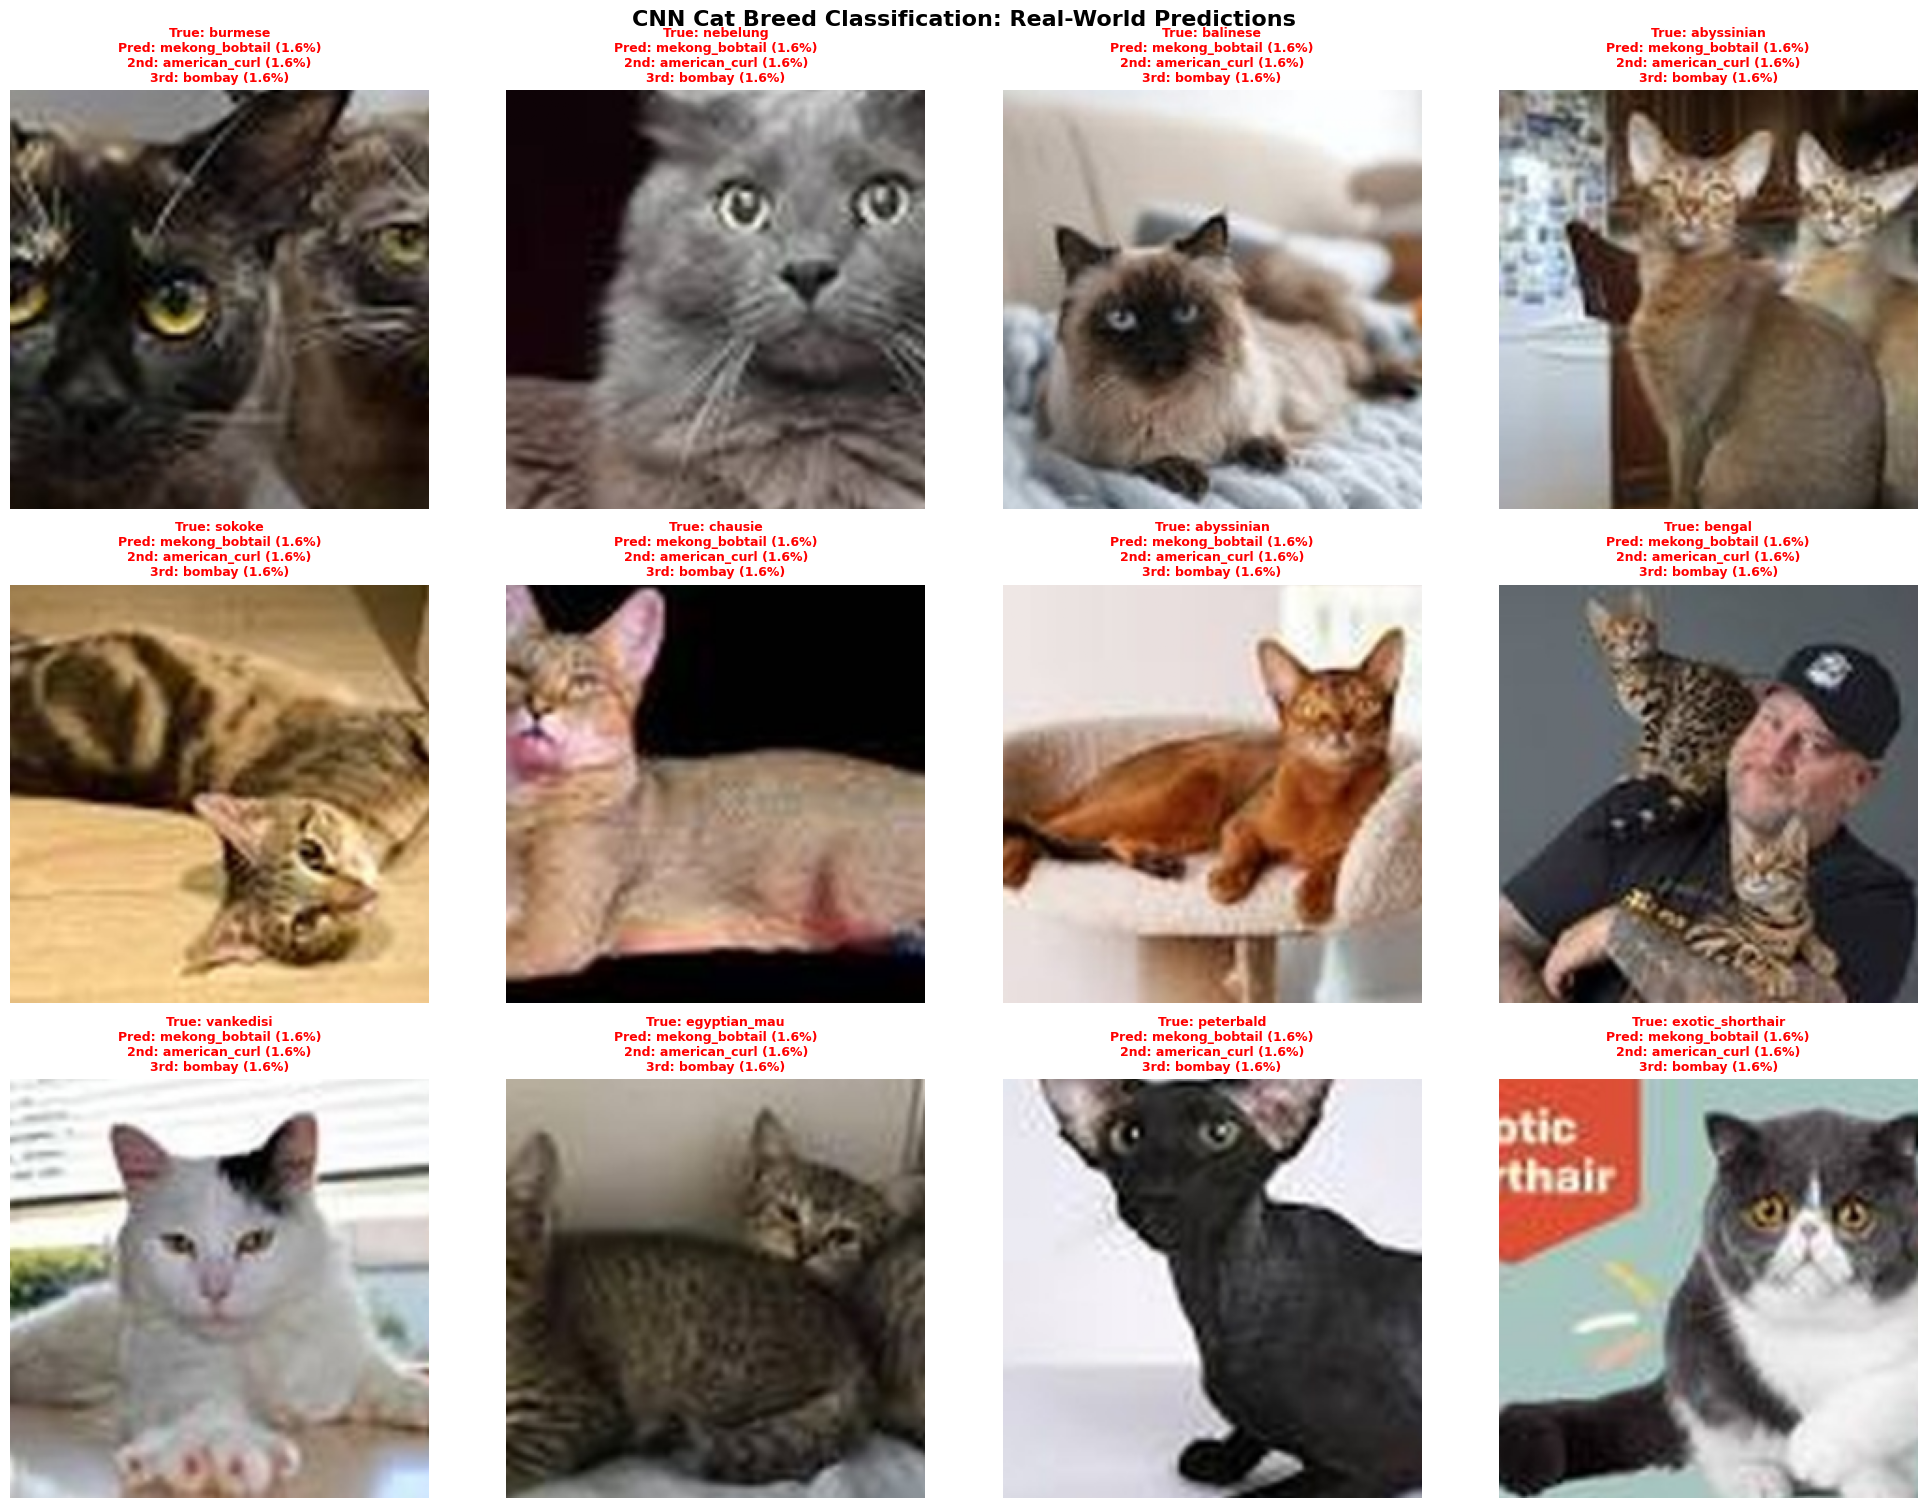

In [6]:
def predict_with_confidence(model, image_tensor, class_names, top_k=3):
    """Get top-k predictions with confidence scores"""
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.unsqueeze(0).to(device)
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)
        top_probs, top_indices = torch.topk(probabilities, top_k)
    
    predictions = []
    for prob, idx in zip(top_probs[0], top_indices[0]):
        predictions.append({
            'breed': class_names[idx.item()],
            'confidence': prob.item() * 100
        })
    return predictions

def visualize_predictions(model, test_dataset, test_dataset_viz, class_names, num_samples=12, random_seed=69):
    """Visualize model predictions on test images"""
    np.random.seed(random_seed)
    indices = np.random.choice(len(test_dataset), num_samples, replace=False)
    
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.ravel()
    
    for idx, image_idx in enumerate(indices):
        # Get normalized image for prediction
        image_tensor, true_label = test_dataset[image_idx]
        # Get unnormalized image for display
        image_viz, _ = test_dataset_viz[image_idx]
        
        # Get predictions
        predictions = predict_with_confidence(model, image_tensor, class_names, top_k=3)
        true_breed = class_names[true_label]
        
        # Check if prediction is correct
        is_correct = predictions[0]['breed'] == true_breed
        
        # Display image
        img_display = image_viz.permute(1, 2, 0).numpy()
        axes[idx].imshow(img_display)
        axes[idx].axis('off')
        
        # Create title with predictions
        title = f"True: {true_breed}\n"
        title += f"Pred: {predictions[0]['breed']} ({predictions[0]['confidence']:.1f}%)\n"
        title += f"2nd: {predictions[1]['breed']} ({predictions[1]['confidence']:.1f}%)\n"
        title += f"3rd: {predictions[2]['breed']} ({predictions[2]['confidence']:.1f}%)"
        
        # Color code based on correctness
        color = 'green' if is_correct else 'red'
        axes[idx].set_title(title, fontsize=9, color=color, weight='bold')
        
        # Add border
        for spine in axes[idx].spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(3)
    
    plt.tight_layout()
    plt.suptitle('CNN Cat Breed Classification: Real-World Predictions', 
                 fontsize=16, weight='bold', y=1.002)
    plt.show()

# Run visualization
visualize_predictions(model, test_dataset, test_dataset_viz, class_names, num_samples=12)

### Grad-CAM
Gradient-weighted Class Activation Mapping (Grad-CAM) shows which regions of the image are most important for the CNN's classification decision. This reveals what visual features the model focuses on when identifying cat breeds.

c:\Users\Guang\anaconda3\envs\py313\Lib\site-packages\torch\nn\modules\module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


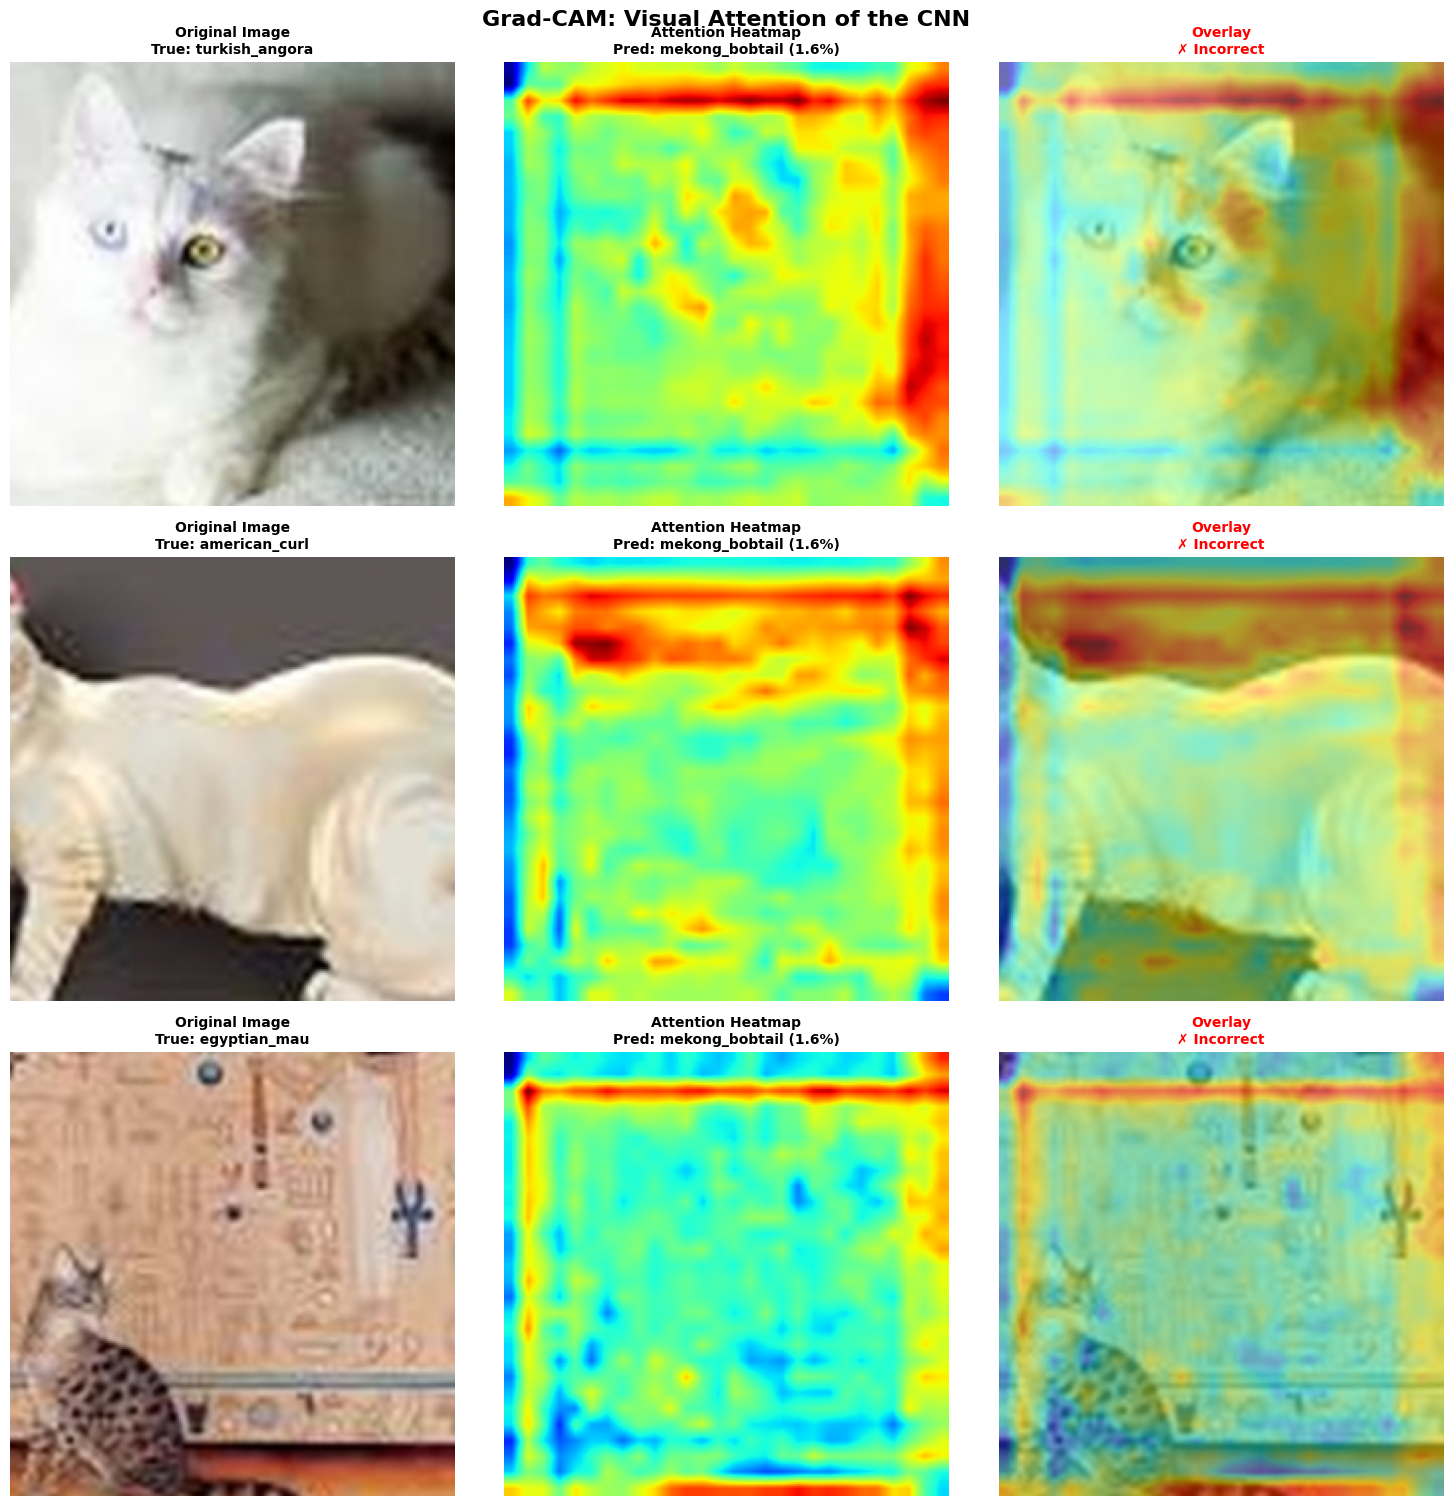

In [7]:
class GradCAM:
    """Gradient-weighted Class Activation Mapping"""
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        
        # Register hooks
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)
    
    def save_activation(self, module, input, output):
        self.activations = output.detach()
    
    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()
    
    def generate_cam(self, input_tensor, target_class=None):
        """Generate CAM for the target class"""
        # Forward pass
        model_output = self.model(input_tensor)
        
        if target_class is None:
            target_class = model_output.argmax(dim=1)
        
        # Backward pass
        self.model.zero_grad()
        class_loss = model_output[0, target_class]
        class_loss.backward()
        
        # Generate CAM
        gradients = self.gradients[0]
        activations = self.activations[0]
        weights = gradients.mean(dim=(1, 2), keepdim=True)
        cam = (weights * activations).sum(dim=0)
        cam = F.relu(cam)
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)
        
        return cam.cpu().numpy(), target_class.item()

def visualize_gradcam(model, test_dataset, test_dataset_viz, class_names, num_samples=6, random_seed=52):
    """Visualize Grad-CAM heatmaps for predictions"""
    np.random.seed(random_seed)
    indices = np.random.choice(len(test_dataset), num_samples, replace=False)
    
    # Use the last convolutional layer (conv8)
    grad_cam = GradCAM(model, model.conv8)
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 5))
    
    for idx, image_idx in enumerate(indices):
        # Get images
        image_tensor, true_label = test_dataset[image_idx]
        image_viz, _ = test_dataset_viz[image_idx]
        
        # Generate CAM
        model.eval()
        input_tensor = image_tensor.unsqueeze(0).to(device)
        cam, predicted_class = grad_cam.generate_cam(input_tensor)
        
        # Get prediction info
        predictions = predict_with_confidence(model, image_tensor, class_names, top_k=1)
        true_breed = class_names[true_label]
        pred_breed = predictions[0]['breed']
        confidence = predictions[0]['confidence']
        
        # Resize CAM to match image
        cam_resized = cv2.resize(cam, (224, 224))
        
        # Convert image for display
        img_display = image_viz.permute(1, 2, 0).numpy()
        
        # Plot original image
        axes[idx, 0].imshow(img_display)
        axes[idx, 0].set_title(f'Original Image\nTrue: {true_breed}', fontsize=10, weight='bold')
        axes[idx, 0].axis('off')
        
        # Plot heatmap
        axes[idx, 1].imshow(cam_resized, cmap='jet')
        axes[idx, 1].set_title(f'Attention Heatmap\nPred: {pred_breed} ({confidence:.1f}%)', 
                              fontsize=10, weight='bold')
        axes[idx, 1].axis('off')
        
        # Plot overlay
        axes[idx, 2].imshow(img_display)
        axes[idx, 2].imshow(cam_resized, cmap='jet', alpha=0.5)
        is_correct = true_breed == pred_breed
        title_color = 'green' if is_correct else 'red'
        axes[idx, 2].set_title(f'Overlay\n{"✓ Correct" if is_correct else "✗ Incorrect"}', 
                              fontsize=10, weight='bold', color=title_color)
        axes[idx, 2].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Grad-CAM: Visual Attention of the CNN', fontsize=16, weight='bold', y=1.001)
    plt.show()

# Run Grad-CAM visualization
visualize_gradcam(model, test_dataset, test_dataset_viz, class_names, num_samples=3)

### Feature Map Visualization
This visualization shows the internal representations learned by different convolutional layers. Early layers detect simple features (edges, textures), while deeper layers capture complex patterns specific to cat breeds.

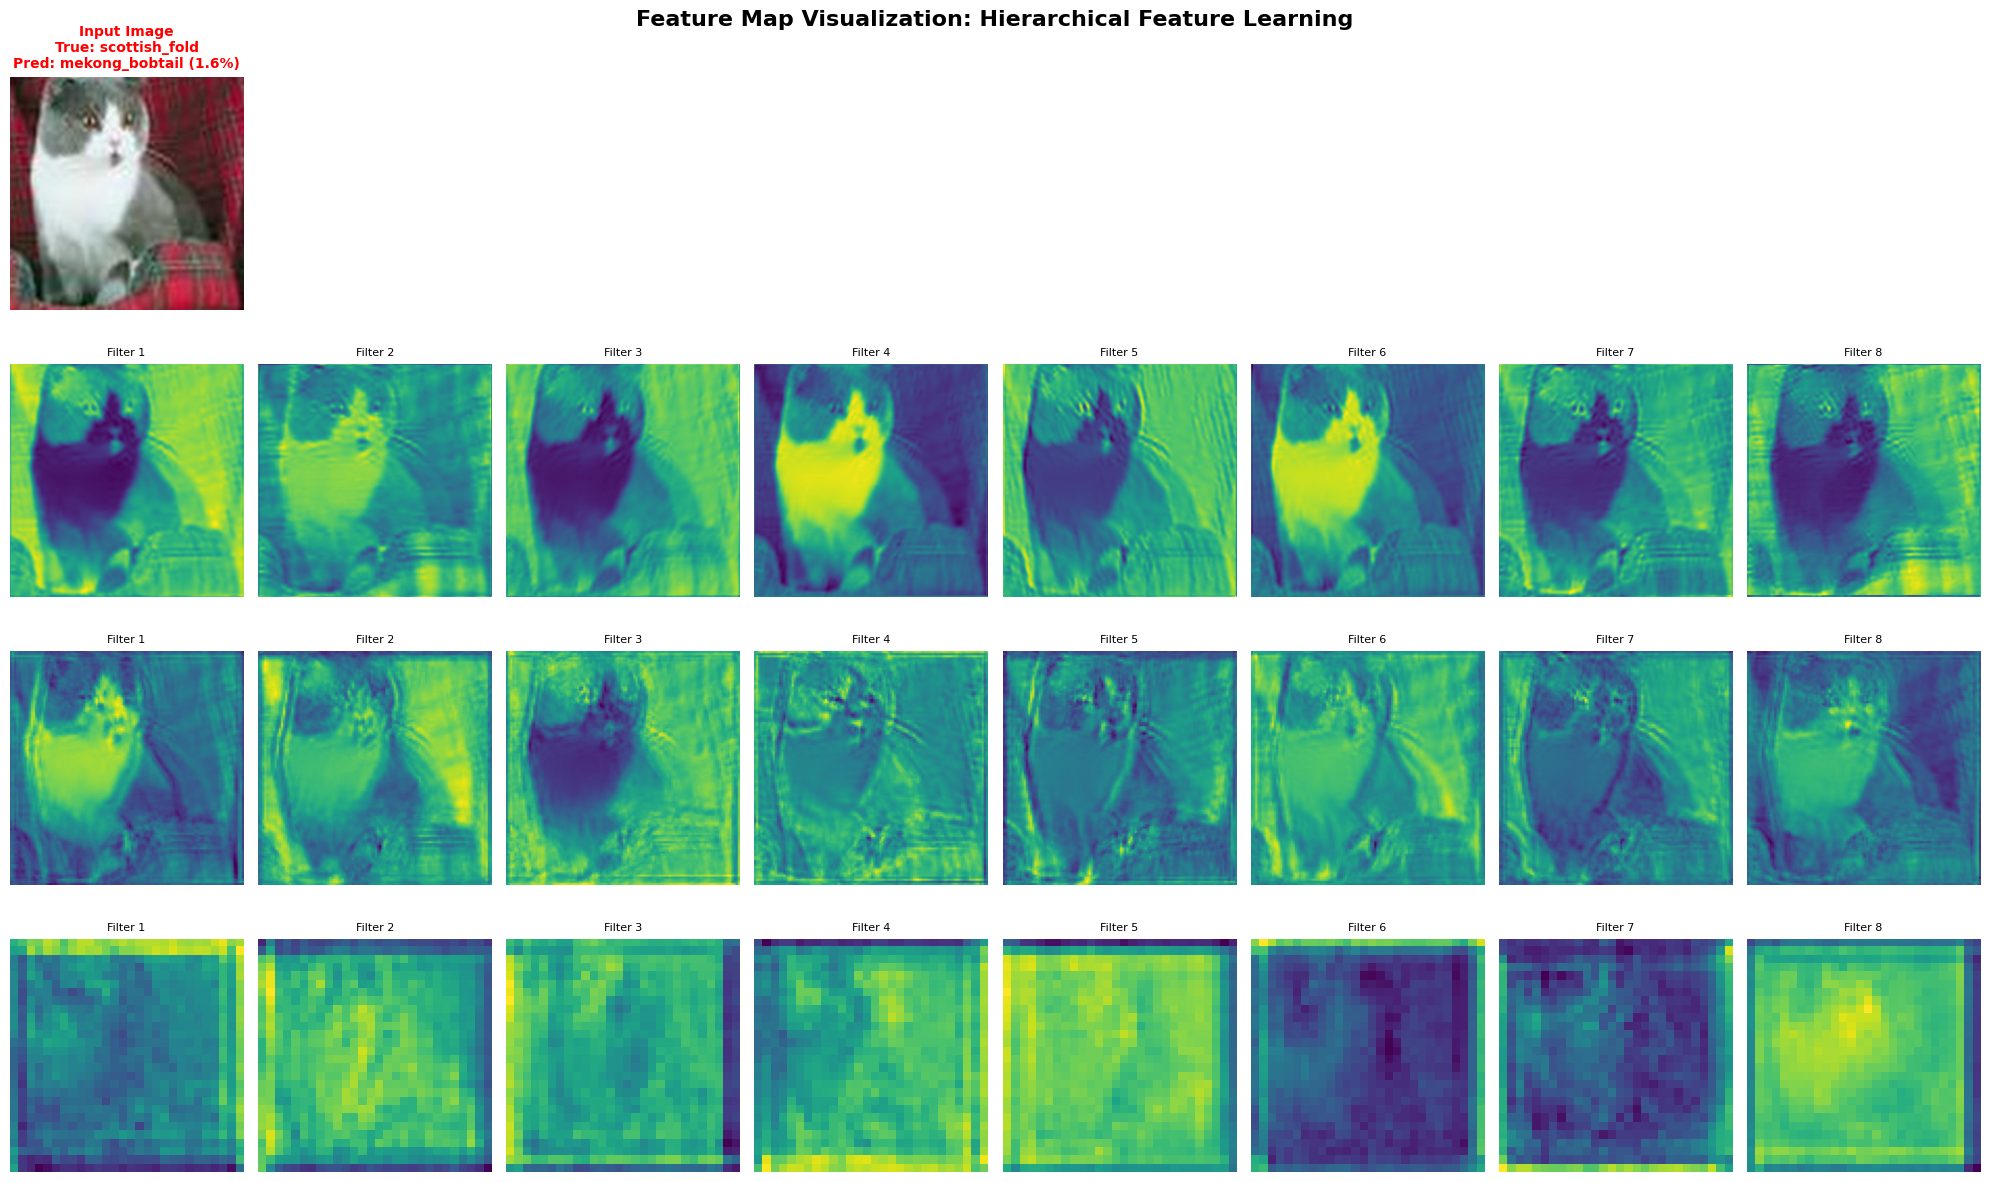

In [8]:
def get_feature_maps(model, image_tensor, layers_to_visualize):
    """Extract feature maps from specified layers"""
    feature_maps = {}
    
    def hook_fn(name):
        def hook(module, input, output):
            feature_maps[name] = output.detach()
        return hook
    
    # Register hooks
    hooks = []
    for name, layer in layers_to_visualize.items():
        hooks.append(layer.register_forward_hook(hook_fn(name)))
    
    # Forward pass
    model.eval()
    with torch.no_grad():
        _ = model(image_tensor.unsqueeze(0).to(device))
    
    # Remove hooks
    for hook in hooks:
        hook.remove()
    
    return feature_maps

def visualize_feature_maps(model, test_dataset, test_dataset_viz, class_names, image_idx=None, random_seed=52):
    """Visualize feature maps from different CNN layers"""
    if image_idx is None:
        np.random.seed(random_seed)
        image_idx = np.random.randint(0, len(test_dataset))
    
    # Get image
    image_tensor, true_label = test_dataset[image_idx]
    image_viz, _ = test_dataset_viz[image_idx]
    true_breed = class_names[true_label]
    
    # Get prediction
    predictions = predict_with_confidence(model, image_tensor, class_names, top_k=1)
    pred_breed = predictions[0]['breed']
    confidence = predictions[0]['confidence']
    
    # Define layers to visualize (early, middle, deep)
    layers_to_visualize = {
        'Early (Conv1)': model.conv1,
        'Middle (Conv4)': model.conv4,
        'Deep (Conv8)': model.conv8
    }
    
    # Get feature maps
    feature_maps = get_feature_maps(model, image_tensor, layers_to_visualize)
    
    # Create visualization
    fig = plt.figure(figsize=(20, 12))
    
    # Plot original image
    ax_img = plt.subplot(4, 8, 1)
    img_display = image_viz.permute(1, 2, 0).numpy()
    ax_img.imshow(img_display)
    is_correct = true_breed == pred_breed
    title_color = 'green' if is_correct else 'red'
    ax_img.set_title(f'Input Image\nTrue: {true_breed}\nPred: {pred_breed} ({confidence:.1f}%)',
                     fontsize=10, weight='bold', color=title_color)
    ax_img.axis('off')
    
    # Plot feature maps for each layer
    row_offset = 1
    for layer_idx, (layer_name, feature_map) in enumerate(feature_maps.items()):
        # Get first 8 feature maps from this layer
        maps = feature_map[0].cpu().numpy()
        num_maps = min(8, maps.shape[0])
        
        for i in range(num_maps):
            ax = plt.subplot(4, 8, row_offset * 8 + i + 1)
            feature = maps[i]
            
            # Normalize for visualization
            feature = (feature - feature.min()) / (feature.max() - feature.min() + 1e-8)
            
            ax.imshow(feature, cmap='viridis')
            if i == 0:
                ax.set_ylabel(layer_name, fontsize=10, weight='bold', rotation=0, 
                            labelpad=60, verticalalignment='center')
            ax.set_title(f'Filter {i+1}', fontsize=8)
            ax.axis('off')
        
        row_offset += 1
    
    plt.tight_layout()
    plt.suptitle('Feature Map Visualization: Hierarchical Feature Learning', 
                 fontsize=16, weight='bold', y=0.998)
    plt.show()
    

# Run feature map visualization
visualize_feature_maps(model, test_dataset, test_dataset_viz, class_names)

### Christina Vo -- Logistic Regression Analysis and Visualization

In [9]:
# import libraries

### Conclusion and Results

share our findings and what we conclude as a team